In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

%matplotlib inline

In [3]:
import pandas as pd

In [4]:
molclr = pd.read_csv("../molclr_classifcation_res.csv")

In [5]:
molclr = molclr[molclr["name"] == "qmug"]

In [6]:
molclr["accuracy"] = molclr["acc"]

In [7]:
molclr_grouped = molclr.groupby(["classes", "num_size"]).agg(["mean", "std", sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

### Augmented with n-grams

In [8]:
n_gram_augmented = glob("ngram_augmented/*.pkl")
n_gram_augmented_results = []

for f in n_gram_augmented:
    n_gram_augmented_results.append(load_pickle(f))

n_gram_augmented_results = pd.DataFrame(n_gram_augmented_results)

n_gram_augmented_results_grouped = (
    n_gram_augmented_results[
        ["num_classes", "representation", "train_size", "accuracy", "f1_micro", "f1_macro", "kappa"]
    ]
    .groupby(["num_classes", "representation", "train_size"])
    .agg(["mean", "std", sem])
)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [9]:
n_gram_augmented_results_grouped.to_pickle('ngram_augmented_results_grouped.pkl')

### N-gram baseline

In [10]:
n_gram_baseline = glob("ngram_baseline/*.pkl")
n_gram_baseline_results = []

for f in n_gram_baseline:
    n_gram_baseline_results.append(load_pickle(f))

n_gram_baseline_results = pd.DataFrame(n_gram_baseline_results)

n_gram_baseline_results_grouped = (
    n_gram_baseline_results[
        ["num_classes", "representation", "train_size", "accuracy", "f1_micro", "f1_macro", "kappa"]
    ]
    .groupby(["num_classes", "representation", "train_size"])
    .agg(["mean", "std", sem])
)

In [11]:
n_gram_baseline_results_grouped

accuracy                      f1_micro  \
                                           mean       std       sem      mean   
num_classes representation train_size                                           
2           InChI          10          0.510906  0.023462  0.007419  0.510906   
                           50          0.532316  0.016413  0.005190  0.532316   
                           100         0.546555  0.023495  0.007430  0.546555   
                           200         0.557439  0.030377  0.009606  0.557439   
                           500         0.582762  0.021413  0.006771  0.582762   
                           1000        0.597816  0.022029  0.006966  0.597816   
            SELFIES        10          0.556296  0.065738  0.020788  0.556296   
                           50          0.599139  0.042457  0.013426  0.599139   
                           100         0.615319  0.012421  0.003928  0.615319   
                           200         0.622618  0.004058  0.001283  0.622618   
                           500         0.626741  0.002730  0.000863  0.626741   
                           1000        0.628198  0.001962  0.000621  0.628198   
            SMILES         10          0.519041  0.020882  0.006603  0.519041   
                           50          0.549381  0.021995  0.006955  0.549381   
                           100         0.567080  0.022047  0.006972  0.567080   
                           200         0.593443  0.014369  0.004544  0.593443   
                           500         0.619064  0.007622  0.002410  0.619064   
                           1000        0.637168  0.004352  0.001376  0.637168   
5           InChI          10          0.213265  0.016845  0.005327  0.213265   
                           50          0.224182  0.014907  0.004714  0.224182   
                           100         0.229833  0.012694  0.004014  0.229833   
                           200         0.232251  0.014836  0.004692  0.232251   
                           500         0.245363  0.010485  0.003316  0.245363   
                           1000        0.254684  0.015610  0.004936  0.254684   
            SELFIES        10          0.225036  0.028269  0.008940  0.225036   
                           50          0.257262  0.019744  0.006243  0.257262   
                           100         0.272228  0.010709  0.003386  0.272228   
                           200         0.275004  0.012039  0.003807  0.275004   
                           500         0.285248  0.005904  0.001867  0.285248   
                           1000        0.289821  0.003335  0.001055  0.289821   
            SMILES         10          0.200590  0.011854  0.003749  0.200590   
                           50          0.229251  0.011973  0.003786  0.229251   
                           100         0.240676  0.011987  0.003791  0.240676   
                           200         0.258267  0.013225  0.004182  0.258267   
                           500         0.285057  0.009432  0.002983  0.285057   
                           1000        0.302403  0.004339  0.001372  0.302403   

                                                           f1_macro            \
                                            std       sem      mean       std   
num_classes representation train_size                                           
2           InChI          10          0.023462  0.007419  0.465282  0.061570   
                           50          0.016413  0.005190  0.508267  0.028051   
                           100         0.023495  0.007430  0.519532  0.049462   
                           200         0.030377  0.009606  0.534215  0.053872   
                           500         0.021413  0.006771  0.566730  0.039452   
                           1000        0.022029  0.006966  0.578527  0.039028   
            SELFIES        10          0.065738  0.020788  0.535409  0.089180   
                           50          0.042457  0.013426  0.596430  

## Load results


In [12]:
all_out = glob("out/**/*.pkl")

In [13]:
all_out = [load_pickle(p) for p in all_out]

In [14]:
extracted_res = []
xgboost_results = []
tabpfn_results = []

for out in all_out:
    try:
        res = {
            "train_size": out["train_size"],
            "frac_valid": out["frac_valid"],
            "accuracy": out["accuracy"],
            "f1_macro": out["f1_macro"],
            "f1_micro": out["f1_micro"],
            "kappa": out["kappa"],
            "num_classes": out["num_classes"],
            "representation": out["representation"],
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        "train_size": out["train_size"],
        "accuracy": out["xgboost_baseline"]["accuracy"],
        "f1_macro": out["xgboost_baseline"]["f1_macro"],
        "f1_micro": out["xgboost_baseline"]["f1_micro"],
        "kappa": out["xgboost_baseline"]["kappa"],
        "num_classes": out["num_classes"],
    }

    tabpfn_res = {
        "train_size": out["train_size"],
        "accuracy": out["tabpfn_baseline"]["accuracy"],
        "f1_macro": out["tabpfn_baseline"]["f1_macro"],
        "f1_micro": out["tabpfn_baseline"]["f1_micro"],
        "kappa": out["tabpfn_baseline"]["kappa"],
        "num_classes": out["num_classes"],
    }

    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)

In [15]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [16]:
grouped_res = res.groupby(["num_classes", "representation", "train_size"]).agg(
    ["mean", "std", "count", sem]
)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [19]:
grouped_res.to_pickle("grouped_res.pkl")

In [17]:
grouped_xgboost_res = xgboost_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [18]:
grouped_tabpfn_res = tabpfn_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [19]:
grouped_res.loc[2, :]

frac_valid                            accuracy  \
                                mean       std count       sem      mean   
representation train_size                                                  
InChI          10           0.833333  0.408248     6  0.166667  0.479333   
               50           0.857143  0.377964     7  0.142857  0.539429   
               100          0.857143  0.377964     7  0.142857  0.549714   
               200          0.875000  0.353553     8  0.125000  0.582000   
               500          1.000000  0.000000     7  0.000000  0.686857   
               1000         1.000000       NaN     1       NaN  0.644000   
SELFIES        10           0.833333  0.408248     6  0.166667  0.443333   
               50           0.857143  0.377964     7  0.142857  0.504571   
               100          0.857143  0.377964     7  0.142857  0.549143   
               200          0.875000  0.353553     8  0.125000  0.573500   
               500          0.875000  0.353553     8  0.125000  0.607000   
               1000         1.000000       NaN     1       NaN  0.696000   
SMILES         10           0.857143  0.377964     7  0.142857  0.476571   
               50           0.857143  0.377964     7  0.142857  0.518286   
               100          0.857143  0.377964     7  0.142857  0.562857   
               200          0.875000  0.353553     8  0.125000  0.588000   
               500          0.874500  0.353354     8  0.124930  0.623865   
               1000         1.000000       NaN     1       NaN  0.704000   

                                                     f1_macro                  \
                                std count       sem      mean       std count   
representation train_size                                                       
InChI          10          0.236933     6  0.096727  0.454918  0.229483     6   
               50          0.239616     7  0.090566  0.537949  0.238924     7   
               100         0.244239     7  0.092314  0.548402  0.243619     7   
               200         0.237511     8  0.083973  0.581168  0.237187     8   
               500         0.023745     7  0.008975  0.686309  0.023714     7   
               1000             NaN     1       NaN  0.643309       NaN     1   
SELFIES        10          0.222271     6  0.090742  0.414725  0.221651     6   
               50          0.226856     7  0.085743  0.500993  0.226136     7   
               100         0.245316     7  0.092721  0.547334  0.244654     7   
               200         0.233453     8  0.082538  0.571641  0.232740     8   
               500         0.247518     8  0.087511  0.606876  0.247471     8   
               1000             NaN     1       NaN  0.696000       NaN     1   
SMILES         10          0.213547     7  0.080713  0.434121  0.207634     7   
               50          0.233556     7  0.088276  0.516252  0.233038     7   
               100         0.250245     7  0.094584  0.559786  0.249048     7   
               200         0.238586     8  0.084353  0.586616  0.237971     8   
               500         0.252926     8  0.089423  0.623558  0.252831     8   
               1000             NaN     1       NaN  0.703924       NaN     1   

                                     f1_micro                            \
                                sem      mean       std count       sem   
representation train_size                                                 
InChI          10          0.093686  0.479333  0.236933     6  0.096727   
               50          0.090305  0.539429  0.239616     7  0.090566   
               100         0.092079  0.549714  0.244239     7  0.092314   
               200         0.083858  0.582000  0.237511     8  0.083973   
               500         0.008963  0.686857  0.023745     7  0.008975   
               1000             NaN  0.644000       NaN     1       NaN   
SELFIES        10          0.090488  0.443333  0.222

In [20]:
grouped_tabpfn_res

accuracy                      f1_macro            \
                            mean       std       sem      mean       std   
num_classes train_size                                                     
2           10          0.556182  0.027143  0.005787  0.540973  0.040501   
            50          0.561000  0.027238  0.005560  0.558191  0.029964   
            100         0.582333  0.025840  0.005275  0.581697  0.025802   
            200         0.605333  0.026695  0.005137  0.604675  0.027105   
            500         0.628000  0.045122  0.009024  0.626998  0.045894   
            1000        0.644000  0.000000  0.000000  0.643858  0.000000   
5           10          0.220000  0.029148  0.006361  0.207449  0.033101   
            50          0.236000  0.026833  0.005855  0.228163  0.024369   
            100         0.257714  0.034002  0.007420  0.238201  0.038085   
            200         0.296400  0.030516  0.006823  0.273130  0.035190   
            500         0.340000  0.025267  0.005514  0.310946  0.022472   
            1000        0.300000  0.000000  0.000000  0.288270  0.000000   

                                  f1_micro                         kappa  \
                             sem      mean       std       sem      mean   
num_classes train_size                                                     
2           10          0.008635  0.556182  0.027143  0.005787  0.112364   
            50          0.006116  0.561000  0.027238  0.005560  0.122000   
            100         0.005267  0.582333  0.025840  0.005275  0.164667   
            200         0.005216  0.605333  0.026695  0.005137  0.210667   
            500         0.009179  0.628000  0.045122  0.009024  0.256000   
            1000        0.000000  0.644000  0.000000  0.000000  0.288000   
5           10          0.007223  0.220000  0.029148  0.006361  0.025000   
            50          0.005318  0.236000  0.026833  0.005855  0.045000   
            100         0.008311  0.257714  0.034002  0.007420  0.072143   
            200         0.007869  0.296400  0.030516  0.006823  0.120500   
            500         0.004904  0.340000  0.025267  0.005514  0.175000   
            1000        0.000000  0.300000  0.000000  0.000000  0.125000   

                                            
                             std       sem  
num_classes train_size                      
2           10          0.054285  0.011574  
            50          0.054476  0.011120  
            100         0.051680  0.010549  
            200         0.053390  0.010275  
            500         0.090244  0.018049  
            1000        0.000000  0.000000  
5           10          0.036435  0.007951  
            50          0.033541  0.007319  
            100         0.042502  0.009275  
            200         0.038144  0.008529  
            500         0.031583  0.006892  
            1000        0.000000  0.000000

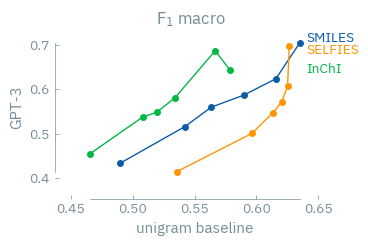

In [21]:
fig, ax = plt.subplots(figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))

for representation, rn in [("SMILES", "SMILES"), ("InChI", "InChI"), ("SELFIES", "SELFIES")]:
    ax.plot(
        n_gram_baseline_results_grouped.loc[2, representation, :]["f1_macro"]["mean"],
        grouped_res.loc[2, representation, :]["f1_macro"]["mean"],
        label=rn,
        marker="o",
        markersize=4,
    )

matplotx.line_labels(ax)

range_frame(
    ax,
    n_gram_baseline_results_grouped.loc[2, :, :]["f1_macro"]["mean"].values.reshape(-1, 1),
    grouped_res.loc[2, :, :]["f1_macro"]["mean"].values.reshape(-1, 1),
)

ax.set_xlabel("unigram baseline")
ax.set_ylabel("GPT-3")

fig.suptitle(r"F$_1$ macro")

fig.savefig("unigram_gpt_corr.pdf", bbox_inches="tight")

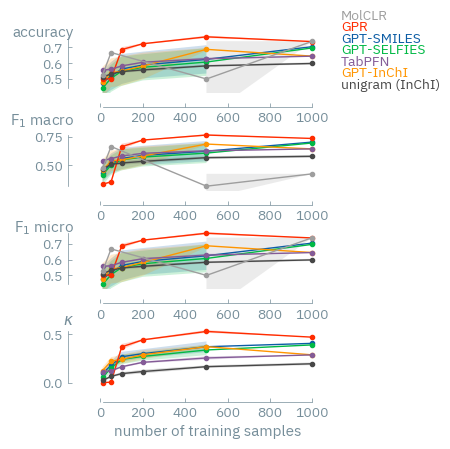

In [22]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[2, "SMILES", :].index,
        grouped_res.loc[2, "SMILES", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "SMILES", :].index,
        grouped_res.loc[2, "SMILES", :][metric]["mean"]
        - grouped_res.loc[2, "SMILES", :][metric]["sem"],
        grouped_res.loc[2, "SMILES", :][metric]["mean"]
        + grouped_res.loc[2, "SMILES", :][metric]["sem"],
        alpha=0.2,
    )

    if metric == "kappa":
        range_frame(
            ax[i],
            grouped_res.loc[2, "SMILES", :].index,
            np.stack(
                [
                    grouped_res.loc[2, "SMILES", :][metric]["mean"].values,
                    grouped_res.loc[2, "SELFIES", :][metric]["mean"].values,
                    grouped_xgboost_res.loc[2, :][metric]["mean"].values,
                ]
            ),
            pad=0.1,
        )
    else:
        range_frame(
            ax[i],
            grouped_res.loc[2, "SMILES", :].index,
            np.vstack(
                [
                    grouped_res.loc[2, "SMILES", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_res.loc[2, "SELFIES", :][metric]["mean"].values.reshape(-1, 1),
                    grouped_xgboost_res.loc[2, :][metric]["mean"].values.reshape(-1, 1),
                    molclr_grouped.loc[2, :][metric]["mean"].values.reshape(-1, 1),
                ]
            ),
            pad=0.1,
        )

    ax[i].plot(
        grouped_res.loc[2, "SELFIES", :].index,
        grouped_res.loc[2, "SELFIES", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "SELFIES", :].index,
        grouped_res.loc[2, "SELFIES", :][metric]["mean"]
        - grouped_res.loc[2, "SELFIES", :][metric]["sem"],
        grouped_res.loc[2, "SELFIES", :][metric]["mean"]
        + grouped_res.loc[2, "SELFIES", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, "InChI", :].index,
        grouped_res.loc[2, "InChI", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "InChI", :].index,
        grouped_res.loc[2, "InChI", :][metric]["mean"]
        - grouped_res.loc[2, "InChI", :][metric]["sem"],
        grouped_res.loc[2, "InChI", :][metric]["mean"]
        + grouped_res.loc[2, "InChI", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        - grouped_xgboost_res.loc[2, :][metric]["sem"],
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        + grouped_xgboost_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :][metric]["mean"],
        marker="o",
        label="TabPFN",
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :][metric]["mean"] - grouped_tabpfn_res.loc[2, :][metric]["sem"],
        grouped_tabpfn_res.loc[2, :][metric]["mean"] + grouped_tabpfn_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        n_gram_baseline_results_grouped.loc[2, "InChI", :].index,
        n_gram_baseline_results_grouped.loc[2, "InChI", :][metric]["mean"],
        marker="o",
        label="unigram (InChI)",
    )

    ax[i].fill_between(
        n_gram_baseline_results_grouped.loc[2, "InChI", :].index,
        n_gram_baseline_results_grouped.loc[2, "InChI", :][metric]["mean"]
        - n_gram_baseline_results_grouped.loc[2, "InChI", :][metric]["sem"],
        n_gram_baseline_results_grouped.loc[2, "InChI", :][metric]["mean"]
        + n_gram_baseline_results_grouped.loc[2, "InChI", :][metric]["sem"],
        alpha=0.2,
    )

    # ax[i].plot(
    #     n_gram_augmented_results_grouped.loc[2, "SELFIES"].index,
    #     n_gram_augmented_results_grouped.loc[2, "SELFIES"][metric]["mean"],
    #     marker="o",
    #     label="1-gram + selfies",
    # )

    if metric != "kappa":
        ax[i].plot(
            molclr_grouped.loc[2, :].index,
            molclr_grouped.loc[2, :][metric]["mean"],
            marker="o",
            label="MolCLR",
        )
        ax[i].fill_between(
            molclr_grouped.loc[2, :].index,
            molclr_grouped.loc[2, :][metric]["mean"] - molclr_grouped.loc[2, :][metric]["sem"],
            molclr_grouped.loc[2, :][metric]["mean"] + molclr_grouped.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

ax[-1].set_xlabel("number of training samples", labelpad=4)
matplotx.line_labels(ax=ax[0])

ylabel_top("accuracy", ax=ax[0])
ylabel_top(r"F$_{1}$ macro", ax=ax[1])
ylabel_top(r"F$_{1}$ micro", ax=ax[2])
ylabel_top(r"$\kappa$", ax=ax[3])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

fig.savefig("bandgap-classification_results_2_class.pdf", bbox_inches="tight")

In [23]:
find_learning_curve_intersection(
    grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/src/gptchem/evaluator.py:582: RuntimeWarning: overflow encountered in exp
  return -a * np.exp(-b * x) + c


4.274003065437543

In [24]:
find_learning_curve_intersection(
    grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

0.5120418771669539

In [25]:
find_learning_curve_intersection(
    grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        molclr_grouped.loc[2, :].index,
        molclr_grouped.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.023386630782757496

In [26]:
find_learning_curve_intersection(
    grouped_res.loc[2, "SELFIES", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        n_gram_baseline_results_grouped.loc[2, "InChI", :].index,
        n_gram_baseline_results_grouped.loc[2, "InChI", :]["f1_macro"]["mean"],
    )[0],
) / 10

0.7407893463915383

In [27]:
intersections = []

for i, val in enumerate(grouped_res.loc[2, "SMILES", :].index):
    factor = (
        find_learning_curve_intersection(
            grouped_res.loc[2, "SMILES", :]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_xgboost_res.loc[2, :].index,
                grouped_xgboost_res.loc[2, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections.append(factor)

intersections_tabpfn = []

for i, val in enumerate(grouped_res.loc[2, "SMILES", :].index):
    factor = (
        find_learning_curve_intersection(
            grouped_res.loc[2, "SMILES", :]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_tabpfn_res.loc[2, :].index,
                grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections_tabpfn.append(factor)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [28]:
from gptchem.evaluator import add_kappa_vlines

/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/src/gptchem/plotutils.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - pad * (x_max - x_min), x_max + pad * (x_max - x_min))


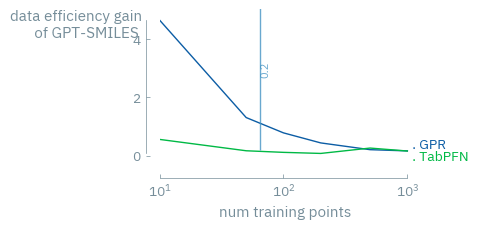

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
ax.plot(grouped_res.loc[2, "SMILES", :].index, intersections, label=" . GPR")
ax.plot(grouped_res.loc[2, "SMILES", :].index, intersections_tabpfn, label=" . TabPFN")
matplotx.line_labels()
add_kappa_vlines(
    grouped_res.loc[2, "SMILES", :].index,
    grouped_res.loc[2, "SMILES", :]["kappa"]["mean"],
    ymax=5.7,
)
ylabel_top("data efficiency gain\n  of GPT-SMILES \n", y_pad=-0.1, x_pad=0.05)
ax.set_xlabel("num training points", labelpad=4)

ax.set_xscale("log")

range_frame(
    ax,
    grouped_res.loc[2, "SMILES", :].index,
    np.stack([intersections, intersections_tabpfn]),
    pad=0.08,
)
fig.savefig("bandgap-binary-data-efficiency.pdf", bbox_inches="tight")

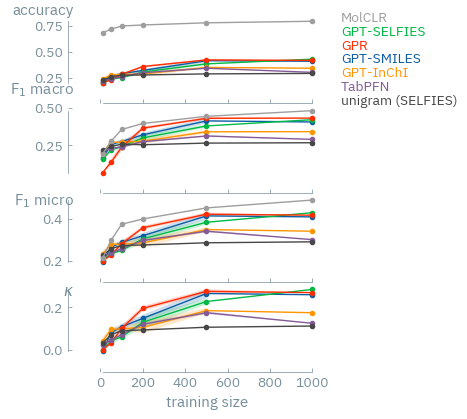

In [30]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[5, "SMILES", :].index,
        grouped_res.loc[5, "SMILES", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "SMILES", :].index,
        grouped_res.loc[5, "SMILES", :][metric]["mean"]
        - grouped_res.loc[5, "SMILES", :][metric]["sem"],
        grouped_res.loc[5, "SMILES", :][metric]["mean"]
        + grouped_res.loc[5, "SMILES", :][metric]["sem"],
        alpha=0.2,
    )

    if metric == "kappa":
        range_frame(
            ax[i],
            grouped_res.loc[5, "SMILES", :].index,
            np.stack(
                [
                    grouped_res.loc[5, "SMILES", :][metric]["mean"].values,
                    grouped_res.loc[5, "SELFIES", :][metric]["mean"].values,
                    grouped_xgboost_res.loc[5, :][metric]["mean"].values,
                ]
            ),
            pad=0.1,
        )
    else:
        range_frame(
            ax[i],
            grouped_res.loc[5, "SMILES", :].index,
            np.stack(
                [
                    grouped_res.loc[5, "SMILES", :][metric]["mean"].values,
                    grouped_res.loc[5, "SELFIES", :][metric]["mean"].values,
                    grouped_xgboost_res.loc[5, :][metric]["mean"].values,
                    molclr_grouped.loc[5, :][metric]["mean"].values,
                ]
            ),
            pad=0.1,
        )
    ax[i].plot(
        grouped_res.loc[5, "SELFIES", :].index,
        grouped_res.loc[5, "SELFIES", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "SELFIES", :].index,
        grouped_res.loc[5, "SELFIES", :][metric]["mean"]
        - grouped_res.loc[5, "SELFIES", :][metric]["sem"],
        grouped_res.loc[5, "SELFIES", :][metric]["mean"]
        + grouped_res.loc[5, "SELFIES", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, "InChI", :].index,
        grouped_res.loc[5, "InChI", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "InChI", :].index,
        grouped_res.loc[5, "InChI", :][metric]["mean"]
        - grouped_res.loc[5, "InChI", :][metric]["sem"],
        grouped_res.loc[5, "InChI", :][metric]["mean"]
        + grouped_res.loc[5, "InChI", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        - grouped_xgboost_res.loc[5, :][metric]["sem"],
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        + grouped_xgboost_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :][metric]["mean"],
        marker="o",
        label="TabPFN",
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :][metric]["mean"] - grouped_tabpfn_res.loc[5, :][metric]["sem"],
        grouped_tabpfn_res.loc[5, :][metric]["mean"] + grouped_tabpfn_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        n_gram_baseline_results_grouped.loc[5, "SELFIES", :].index,
        n_gram_baseline_results_grouped.loc[5, "SELFIES", :][metric]["mean"],
        marker="o",
        label="unigram (SELFIES)",
    )

    if metric != "kappa":
        ax[i].plot(
            molclr_grouped.loc[5, :].index,
            molclr_grouped.loc[5, :][metric]["mean"],
            marker="o",
            label="MolCLR",
        )
        ax[i].fill_between(
            molclr_grouped.loc[5, :].index,
            molclr_grouped.loc[5, :][metric]["mean"] - molclr_grouped.loc[5, :][metric]["sem"],
            molclr_grouped.loc[5, :][metric]["mean"] + molclr_grouped.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

ax[-1].set_xlabel("training size", labelpad=4)
matplotx.line_labels(ax[0])

ylabel_top("accuracy", ax=ax[0])
ylabel_top(r"F$_{1}$ macro", ax=ax[1])
ylabel_top(r"F$_{1}$ micro", ax=ax[2])
ylabel_top(r"$\kappa$", ax=ax[3])

fig.savefig("bandgap-classification_results_5_class.pdf", bbox_inches="tight")

In [31]:
intersections = []

for i, val in enumerate(grouped_res.loc[5, "SMILES", :].index):
    factor = (
        find_learning_curve_intersection(
            grouped_res.loc[5, "SMILES", :]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_xgboost_res.loc[5, :].index,
                grouped_xgboost_res.loc[5, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections.append(factor)

intersections_tabpfn = []

for i, val in enumerate(grouped_res.loc[5, "SMILES", :].index):
    factor = (
        find_learning_curve_intersection(
            grouped_res.loc[5, "SMILES", :]["f1_macro"]["mean"].values[i],
            fit_learning_curve(
                grouped_tabpfn_res.loc[5, :].index,
                grouped_tabpfn_res.loc[5, :]["f1_macro"]["mean"],
            )[0],
        )
        / val
    )

    intersections_tabpfn.append(factor)

/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/src/gptchem/evaluator.py:582: RuntimeWarning: overflow encountered in exp
  return -a * np.exp(-b * x) + c
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/src/gptchem/plotutils.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - pad * (x_max - x_min), x_max + pad * (x_max - x_min))


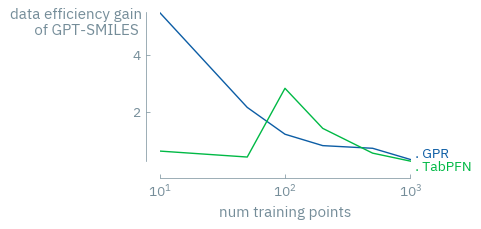

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
ax.plot(grouped_res.loc[5, "SMILES", :].index, intersections, label=" . GPR")
ax.plot(grouped_res.loc[5, "SMILES", :].index, intersections_tabpfn, label=" . TabPFN")
matplotx.line_labels()
add_kappa_vlines(
    grouped_res.loc[5, "SMILES", :].index,
    grouped_res.loc[5, "SMILES", :]["kappa"]["mean"],
    ymax=5.7,
)
ylabel_top("data efficiency gain\n  of GPT-SMILES \n", y_pad=-0.1, x_pad=0.05)
ax.set_xlabel("num training points", labelpad=4)

ax.set_xscale("log")

range_frame(
    ax,
    grouped_res.loc[5, "SMILES", :].index,
    np.stack([intersections, intersections_tabpfn]),
    pad=0.02,
)
fig.savefig("bandgap-5-data-efficiency.pdf", bbox_inches="tight")